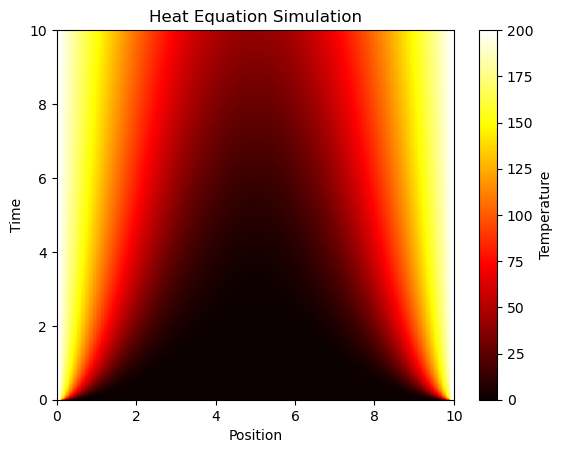

In [10]:
import numpy as np
from matplotlib import pyplot as plt

length = 10               # length of rod
k = 0.466                 # heat constant of steel
temp_at_left_end = 200    # temperature at the left side of the rod
temp_at_right_end = 200   # temperature at the right side of the rod
total_time = 10           # time simulation will run for

dx = 0.1    # space in between points, the smaller the better
x_vec = np.linspace(0, length, int(length/dx))

dt = 0.0001    # space in between steps in time
t_vec = np.linspace(0, total_time, int(total_time/dt))
u = np.zeros([len(t_vec), len(x_vec)])

u[:, 0] = temp_at_left_end     # u(t, 0) = 200
u[:, -1] = temp_at_right_end   # u(t, length) = 200

for t in range(1, len(t_vec)-1):
    for x in range(1, len(x_vec)-1):
        u[t+1, x] = k * (dt / dx**2) * (u[t, x+1] - 2*u[t, x] + 
                    u[t, x-1]) + u[t, x]
# Notice how this equation substitutes the dx and dt that appear
# within the functions themselves with +1 or -1, this is because
# while the theory states that the points will be spaced out by
# +/- dx or +/- dt, in practice an array can only ever be spaced
# out by +1 or -1, so we make due.

# Plotting the results
plt.imshow(u, extent=[0, length, 0, total_time], aspect='auto', origin='lower', cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Heat Equation Simulation')
plt.show()
